In [125]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import shapely.speedups
shapely.speedups.enable()
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

input_path='/Users/ivanjardon/Downloads/'
output_path='/Users/ivanjardon/Documents/'

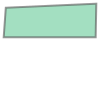

In [152]:
# Create Point objects
p1 = Point(24.952242, 60.1696017)
p2 = Point(24.976567, 60.1612500)

# Create a Polygon
coords = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon(coords)
poly

In [127]:
# Let's check what we have
print(p1)
print(p2)
print(poly)
# Does p1 & p2 are within the polygon?
print(p1.within(poly))
print(p2.within(poly))
# Does polygon contain p1 & p2?
print(poly.contains(p1))
print(poly.contains(p2))

POINT (24.952242 60.1696017)
POINT (24.976567 60.16125)
POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))
True
False
True
False


In [153]:
#OBTENER ZONA DE COBERTURA
cobertura = gpd.read_file(input_path+"Zona de Cobertura.kml", driver='KML')
cobertura

/Users/ivanjardon/python_programs/lib/python3.8/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,Name,Description,geometry
0,Zona de Cobertura Cornershop,Bodega_Name: <br>Adress:,"POLYGON Z ((-99.23882 19.63788 0.00000, -99.30..."


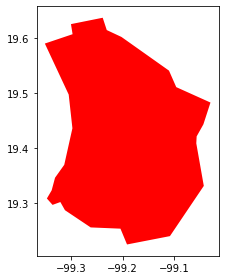

In [154]:
#PLOT ZONA DE COBERTURA
fig, ax = plt.subplots()
cobertura.plot(ax=ax, facecolor='red')
plt.tight_layout()

In [130]:
oxxos = gpd.read_file(input_path+"mkt oxxo.xlsx.kml", driver='KML')
oxxos.head()

/Users/ivanjardon/python_programs/lib/python3.8/site-packages/geopandas/geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


,Name,Description,geometry
0,50011,NOMBRE_TIENDA: Malinalli MEX<br>LATITUD: 19.42...,POINT Z (-98.96534 19.42677 0.00000)
1,50042,NOMBRE_TIENDA: Real Granada MEX<br>LATITUD: 19...,POINT Z (-98.95954 19.73912 0.00000)
2,5005D,NOMBRE_TIENDA: San Antonio MEX<br>LATITUD: 19...,POINT Z (-99.13441 19.41540 0.00000)
3,50069,NOMBRE_TIENDA: Malitzin MEX<br>LATITUD: 19.321...,POINT Z (-98.89320 19.32110 0.00000)
4,5007I,NOMBRE_TIENDA: Patio Ayotla MEX<br>LATITUD: 19...,POINT Z (-98.91961 19.30955 0.00000)


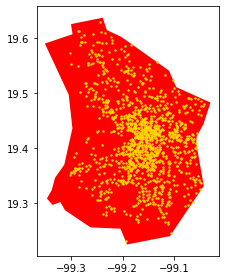

In [137]:
#Verificar puntos dentro del mapa
evaluacion = oxxos.within(cobertura.loc[0, 'geometry'])
oxxos_within = oxxos.loc[evaluacion]
fig, ax = plt.subplots()
cobertura.plot(ax=ax, facecolor='red');
oxxos_within.plot(ax=ax, color='gold', markersize=2);
plt.tight_layout()

oxxos_within.to_file(output_path+'oxxos.kml', driver='KML')

In [132]:
#Etiquetar oxxos dentro del area de cobertura con true or false
oxxos['within coverage area'] = oxxos.within(cobertura.loc[0, 'geometry'])
oxxos.head()



,Name,Description,geometry,within coverage area
0,50011,NOMBRE_TIENDA: Malinalli MEX<br>LATITUD: 19.42...,POINT Z (-98.96534 19.42677 0.00000),False
1,50042,NOMBRE_TIENDA: Real Granada MEX<br>LATITUD: 19...,POINT Z (-98.95954 19.73912 0.00000),False
2,5005D,NOMBRE_TIENDA: San Antonio MEX<br>LATITUD: 19...,POINT Z (-99.13441 19.41540 0.00000),True
3,50069,NOMBRE_TIENDA: Malitzin MEX<br>LATITUD: 19.321...,POINT Z (-98.89320 19.32110 0.00000),False
4,5007I,NOMBRE_TIENDA: Patio Ayotla MEX<br>LATITUD: 19...,POINT Z (-98.91961 19.30955 0.00000),False


In [ ]:
#Exportar a excel los que si estan dentro del area
oxxos.to_excel(output_path+'oxxos.xlsx',index=False)